## Ridículo o ridículos??
Visualicemos los largos de cada programa.

In [1]:
import pandas as pd, seaborn as sns
df = pd.read_csv('primera_lectura.csv')
df.head()

,candidato,distrito,largo,agua,hidrogeno,medio ambiente,medioambiente,sustentabilidad
0,JUAN CARLOS KALAZICH SANTANA,D28,39,False,False,False,False,False
1,PAMELA VARGAS TOLEDO,D4,45269,True,False,True,True,True
2,ANA MARIA VERA HARO,D23,43797,True,False,True,False,False
3,PAMELA ANDREA MORALES ROLDAN,D16,22001,True,False,True,True,True
4,ROMINA ALEJANDRA LE BLANC AMPUERO,D1,10507,True,False,True,False,False


<AxesSubplot:xlabel='distrito', ylabel='largo'>

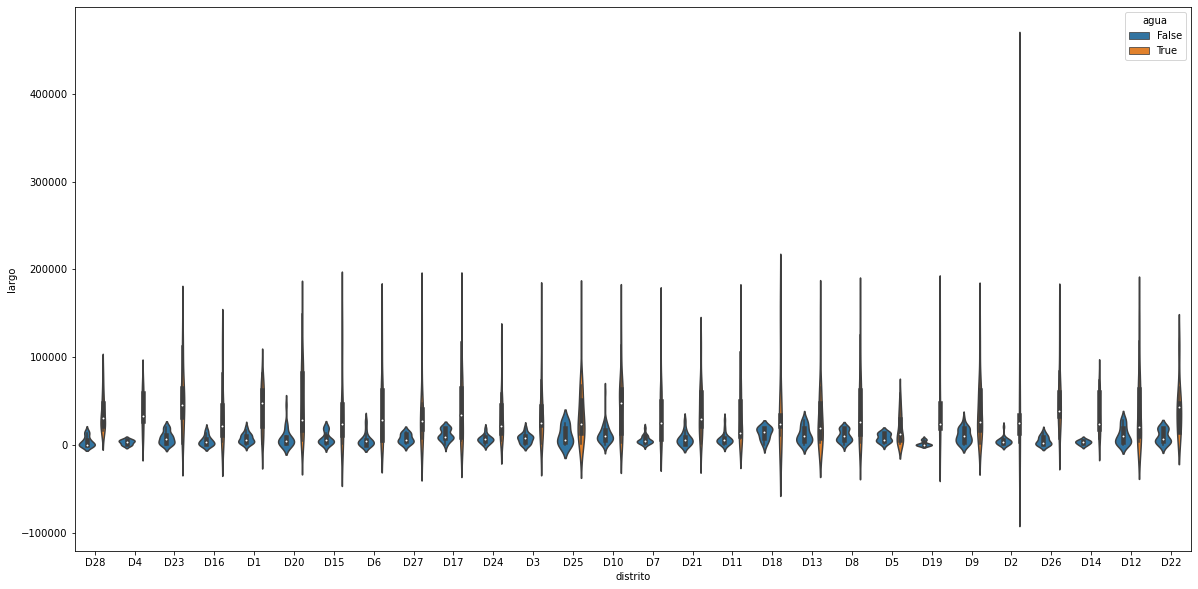

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(20,10))
sns.violinplot(data=df, x='distrito', y='largo', hue='agua')

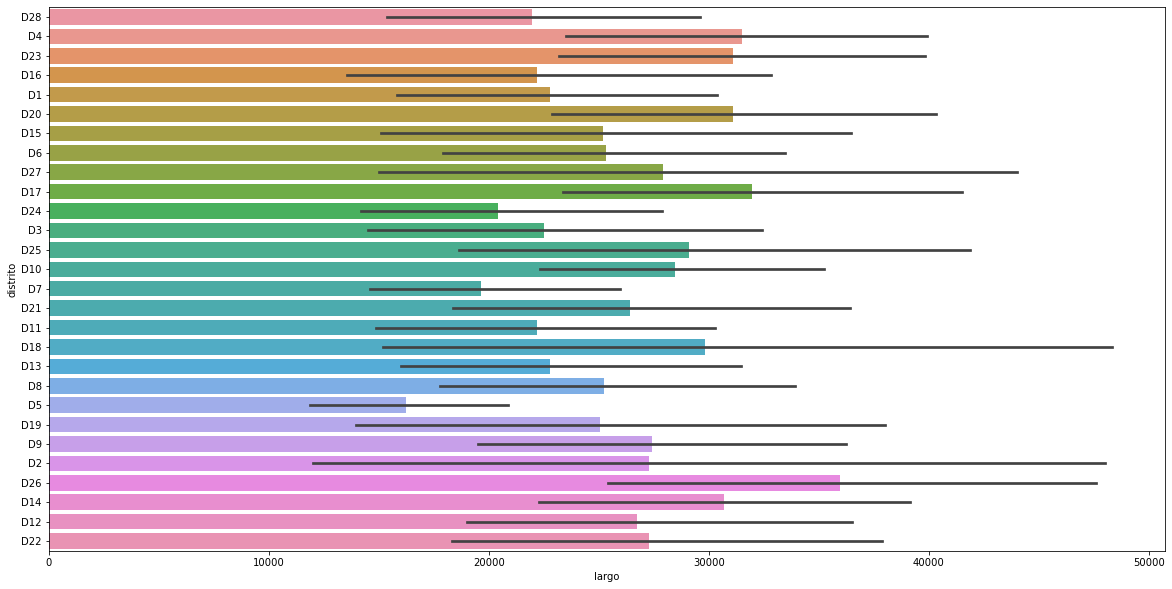

In [3]:
fig, ax = plt.subplots(1, figsize=(20,10))
sns.barplot(data=df, x='largo', y='distrito');

In [4]:
all_df = pd.read_html('https://elecciones2021.servel.cl/programa-candidatos-as-convencionales-constituyentes/')


In [11]:
all_df[0].head()

,0,1,2,3,4
0,DISTRITO,NOMBRE CANDIDATO,LISTA / CANDIDATURA INDEPENDIENTE,PARTIDO,PROGRAMA
1,1,CARLOS ALBERTO YEVENES TORRES,APRUEBO DIGNIDAD,PARTIDO COMUNISTA DE CHILE,Descargar archivo aquí
2,1,CAROLINA ELIANA VIDELA OSORIO,APRUEBO DIGNIDAD,PARTIDO COMUNISTA DE CHILE,Descargar archivo aquí
3,1,HERMANN ROBERTO MONDACA RAITERI,APRUEBO DIGNIDAD,INDEPENDIENTES,Descargar archivo aquí
4,1,OSCAR BORIS PALLERES FLORES,APRUEBO DIGNIDAD,INDEPENDIENTES,Descargar archivo aquí


In [12]:
len(all_df)

16

In [13]:
all_df[15].head()

,0,1,2,3,4
0,DISTRITO,NOMBRE CANDIDATO,LISTA / CANDIDATURA INDEPENDIENTE,PARTIDO,PROGRAMA
1,28,ADRIANA MARCELA BARATELLI,LISTA DEL APRUEBO,INDEPENDIENTES,Descargar archivo aquí
2,28,ALEJANDRA SOZA GALVEZ,REPUBLICA DE LOS INDEPENDIENTES DE MAGALLANES ...,INDEPENDIENTES,Descargar archivo aquí
3,28,ALFREDO FONSECA MIHOVILOVIC,REPUBLICA DE LOS INDEPENDIENTES DE MAGALLANES ...,INDEPENDIENTES,Descargar archivo aquí
4,28,ANDREA LUCIA PIVCEVIC CORTESE,MAGALLANICOS NO NEUTRALES (D28),INDEPENDIENTES,Descargar archivo aquí


In [5]:
xdf=pd.DataFrame()
for adf in all_df:
    adf.columns=adf.iloc[0]
    adf=adf.iloc[1:]
    xdf = xdf.append(adf)
xdf.DISTRITO.value_counts()

10    78
7     77
6     71
12    63
20    60
11    59
8     59
23    56
9     56
17    53
13    50
2     43
3     42
5     42
15    42
19    40
24    40
21    39
1     38
28    35
26    34
16    34
22    31
14    31
4     29
25    28
27    26
18    22
Name: DISTRITO, dtype: int64

In [15]:
xdf.columns

Index(['DISTRITO', 'NOMBRE CANDIDATO', 'LISTA / CANDIDATURA INDEPENDIENTE',
       'PARTIDO', 'PROGRAMA'],
      dtype='object', name=0)

In [16]:
xdf.columns=[c.lower() for c in xdf]

In [20]:
xdf = xdf.rename(columns={'nombre candidato':'candidato', 'lista / candidatura independiente': 'lista'})
xdf.columns

Index(['distrito', 'candidato', 'lista', 'partido', 'programa'], dtype='object')

In [21]:
pwd

'/home/ubuntu/GREENPEACE'

In [22]:
xdf.to_csv('candidatos.csv',index=False)

In [6]:
tdf=pd.read_csv('primera_lectura.csv')
tdf.head()

,candidato,distrito,largo,agua,hidrogeno,medio ambiente,medioambiente,sustentabilidad
0,JUAN CARLOS KALAZICH SANTANA,D28,39,False,False,False,False,False
1,PAMELA VARGAS TOLEDO,D4,45269,True,False,True,True,True
2,ANA MARIA VERA HARO,D23,43797,True,False,True,False,False
3,PAMELA ANDREA MORALES ROLDAN,D16,22001,True,False,True,True,True
4,ROMINA ALEJANDRA LE BLANC AMPUERO,D1,10507,True,False,True,False,False


In [24]:
alexa = xdf.merge(tdf)
print(len(alexa),len(xdf),len(tdf))  # faltan 20 en tdf! 

0 1278 1258


In [11]:
import glob
nueva = 'naturaleza'
tdf[nueva] = [nueva in open(fn).read() for fn in glob.glob('TEXTOS/TODOS/*.txt')] 
for word in tdf.columns[3:]:
    print(word, len(tdf[tdf[word]]))

agua 712
hidrogeno 24
medio ambiente 679
medioambiente 344
sustentabilidad 255
certeza 66
derechos de agua 13
naturaleza 701


In [19]:
tdf.head()
tdf[tdf.agua].distrito.value_counts().head(10).to_dict()

#import sqlite3
#conn = sqlite3.connect('programas.db')
#tdf.to_sql('palabras', conn, index=False)
#xdf.to_sql('candidatos', conn, index=False)

{'D6': 41,
 'D7': 37,
 'D10': 37,
 'D11': 36,
 'D20': 33,
 'D5': 33,
 'D12': 32,
 'D17': 32,
 'D9': 31,
 'D23': 28}

In [20]:
sql = lambda q: pd.read_sql(q, conn)
edf = sql('SELECT palabras.candidato, palabras.distrito, largo, lista, partido, medioambiente, sustentabilidad FROM palabras JOIN candidatos ON palabras.candidato=candidatos.candidato')
edf.sample(5)

NameError: name 'conn' is not defined

In [43]:
# largos en grumos
ldf = edf.largo.value_counts().head(10)
ldf

5895      53
10365     48
19517     47
47595     46
21608     36
34681     30
112783    26
4525      21
149534    20
15        20
Name: largo, dtype: int64

# Todos los de 5895, pasen por acá!

In [42]:
sdf1=edf[edf.largo==5895]
sdf1

,candidato,distrito,largo,lista,partido,medioambiente,sustentabilidad
21,MARCELO TORCHE SUAREZ,D28,5895,VAMOS POR CHILE,INDEPENDIENTES,0,0
49,CARLOS DANIEL MARTIN PRUNOTTO,D4,5895,VAMOS POR CHILE,UNION DEMOCRATA INDEPENDIENTE,0,0
55,MACARENA URENDA SALAMANCA,D7,5895,VAMOS POR CHILE,UNION DEMOCRATA INDEPENDIENTE,0,0
56,PABLO WALTER HERDENER TRUAN,D23,5895,VAMOS POR CHILE,UNION DEMOCRATA INDEPENDIENTE,0,0
86,FELIPE IGNACIO MENA VILLAR,D24,5895,VAMOS POR CHILE,UNION DEMOCRATA INDEPENDIENTE,0,0
114,JAIME FLORES SIERRALTA,D10,5895,VAMOS POR CHILE,UNION DEMOCRATA INDEPENDIENTE,0,0
138,MARGARITA LETELIER CORTES,D19,5895,VAMOS POR CHILE,UNION DEMOCRATA INDEPENDIENTE,0,0
192,PAZ CHARPENTIER RAJCEVICH,D20,5895,VAMOS POR CHILE,INDEPENDIENTES,0,0
224,JAIME COLOMA ALAMOS,D14,5895,VAMOS POR CHILE,UNION DEMOCRATA INDEPENDIENTE,0,0
249,MARTIN ARRAU GARCIA-HUIDOBRO,D19,5895,VAMOS POR CHILE,UNION DEMOCRATA INDEPENDIENTE,0,0


In [55]:
# otros perlas
from IPython.display import HTML
html = '<TABLE>'
for largo in ldf.index:
    #print('-'*80, chr(10), 'LARGO=', largo)
    los_largos = edf[edf.largo==largo]
    cuantos = len(los_largos)
    pdf = pd.DataFrame(los_largos.partido.value_counts()).to_html()
    lidf = pd.DataFrame(los_largos.lista.value_counts()).to_html()
    html += f'<TR><TH>{cuantos} idénticos, largo={largo}<TD>{pdf}</TD><TD>{lidf}</TD></TR>'
HTML(html)

,partido
UNION DEMOCRATA INDEPENDIENTE,32
INDEPENDIENTES,21
,lista
VAMOS POR CHILE,53
,partido
PARTIDO TRABAJADORES REVOLUCIONARIOS,48
,lista
PARTIDO DE TRABAJADORES REVOLUCIONARIOS,48
,partido
INDEPENDIENTES,47


In [ ]:
tdf

In [13]:
df[df.candidato.str.contains('PESUTIC')]

,candidato,distrito,largo,agua,hidrogeno,medio ambiente,medioambiente,sustentabilidad
197,ROSA MAGDALENA PESUTIC VUKASOVIC,D27,6496,True,False,False,True,False
1001,MAURICIO PESUTIC PEREZ,D11,10736,True,False,True,False,False


In [15]:
df[abs(df.largo-10736)<10]

,candidato,distrito,largo,agua,hidrogeno,medio ambiente,medioambiente,sustentabilidad
209,ODETTE LOPEZ ORMAZABAL,D2,10736,True,False,True,False,False
1001,MAURICIO PESUTIC PEREZ,D11,10736,True,False,True,False,False
